In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.0.0
즉시 실행: True


In [6]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
데이터셋이 복사된 위치: C:\Users\jesuskyr\.keras\datasets\iris_training.csv


In [7]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [10]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([4.9, 7.2, 6.4, 4.9, 4.4, 6.5, 5.8, 6.1, 4.6, 7.3, 4.6, 7.7, 6.7,
       5.4, 5.7, 5.8, 6.7, 6.4, 5.1, 5.8, 5.2, 5.7, 6.9, 5. , 6. , 6.7,
       4.5, 5.5, 5.8, 5.8, 6.8, 7.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([2.5, 3. , 2.8, 3.1, 2.9, 3. , 2.8, 2.6, 3.6, 2.9, 3.4, 3.8, 3.1,
       3.4, 2.9, 2.7, 3.3, 2.7, 3.5, 4. , 3.4, 4.4, 3.1, 2. , 2.9, 3. ,
       2.3, 2.4, 2.7, 2.6, 3.2, 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([4.5, 5.8, 5.6, 1.5, 1.4, 5.8, 5.1, 5.6, 1. , 6.3, 1.4, 6.7, 5.6,
       1.5, 4.2, 5.1, 5.7, 5.3, 1.4, 1.2, 1.4, 1.5, 4.9, 3.5, 4.5, 5. ,
       1.3, 3.8, 5.1, 4. , 5.9, 6.7], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([1.7, 1.6, 2.2, 0.1, 0.2, 2.2, 2.4, 1.4, 0.2, 1.8, 0.3, 2.2, 2.4,
       0.4, 1.3, 1.9, 2.1, 1.9, 0

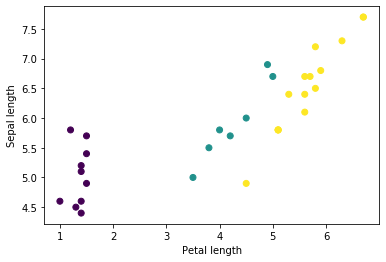

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()